# Hopfield 1

We're basically going to see if I can get Hopfield Networks to work.

In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tensorflow.keras.datasets import mnist
from tqdm import tqdm

m_len = 60_000
tr_len = m_len
m_area = 28 * 28

(x_tr, y_tr), (x_te, y_te) = mnist.load_data()

x_tr = x_tr / 255.0
x_te = x_te / 255.0

In [3]:
flat_tr = x_tr.reshape(-1, m_area)
flat_cr = np.zeros((m_len, 10))

for i in range(m_len):
    flat_cr[i, y_tr[i]] = 1

flat_te = x_te.reshape(-1, m_area)
flat_ce = np.zeros((len(x_te), 10))
for i in range(len(x_te)):
    flat_ce[i, y_te[i]] = 1

gp_ftr = cp.asarray(flat_tr)
gp_cr = cp.asarray(flat_cr)
gp_fte = cp.asarray(flat_te)
gp_ce = cp.asarray(flat_ce)

In [82]:
def draw_hopfield(hopfield, fig):
    fig.clf()
    
    for i in range(10):
        max_val = cp.max(hopfield[i])
        min_val = cp.min(hopfield[i])
        plt.subplot(3, 4, i + 1)
        im = plt.imshow(hopfield[i], cmap="bwr", vmax=max_val, vmin=min_val)
        plt.axis('off')
        fig.colorbar(im, ticks=[min_val, 0, max_val])
        
    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


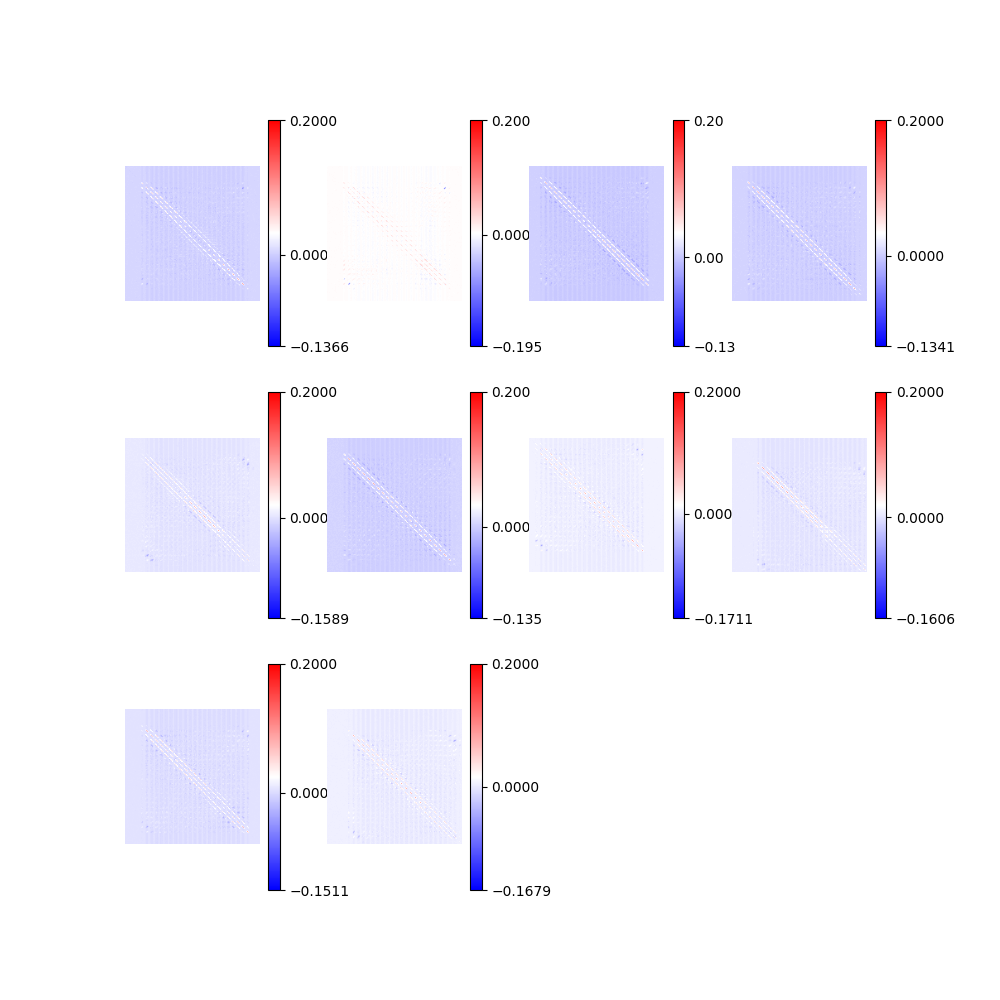

 28%|██▊       | 1696/6000 [00:06<00:15, 282.38it/s]


KeyboardInterrupt: 

In [109]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))

# Init hopfield networks
hopfield = cp.random.uniform(0, 0.01, (10, m_area, m_area))
for i in range(10):
    cp.fill_diagonal(hopfield[i], 0)

# Number of epochs
Nep = 30

# Training count per epoch
T_s = 6000

tr_len = 6000
alpha = 0.01

for ep in range(Nep):
    rand_pert = np.random.permutation(tr_len)
#     rand_pert = list(range(tr_len)) # JUST FOR DEBUGGING
    inputs = gp_ftr[rand_pert]
    classes = y_tr[rand_pert]
    
    for i in tqdm(range(T_s)):
        v = inputs[i].reshape(-1, 1)

        # Which hop-net to use
        hop_i = classes[i]

        out = hopfield[hop_i] @ v
        e = v - out

        update = alpha * e * v.T
        cp.clip(update, 0, 0.1)
        
        hopfield[hop_i] += update
        cp.fill_diagonal(hopfield[hop_i], 0)
        
        if i % 500:
            cp.clip(hopfield, -0.2, .2, hopfield)
    
    draw_hopfield(hopfield.get(), fig)


<IPython.core.display.Javascript object>


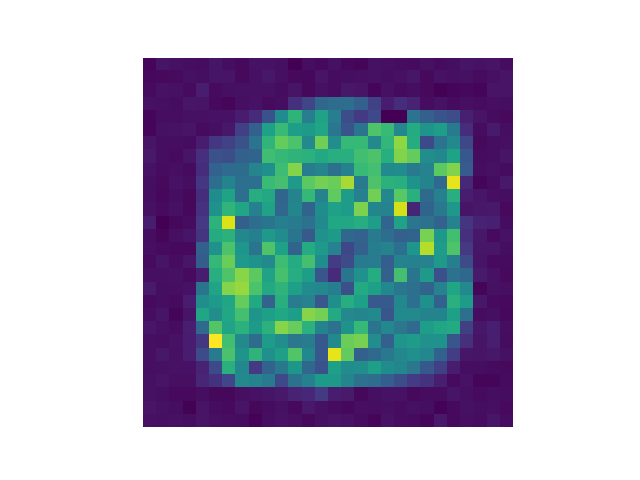

(-0.5, 783.5, 783.5, -0.5)

In [116]:
i, j = 1, 5

plt.figure()
plt.imshow((hopfield[i] - hopfield[j]).get(), cmap="bwr")
plt.axis('off')

In [161]:
import math
def sigmoid(x):
    return 1 / (1 + np.exp(-x + 0.5))

<IPython.core.display.Javascript object>


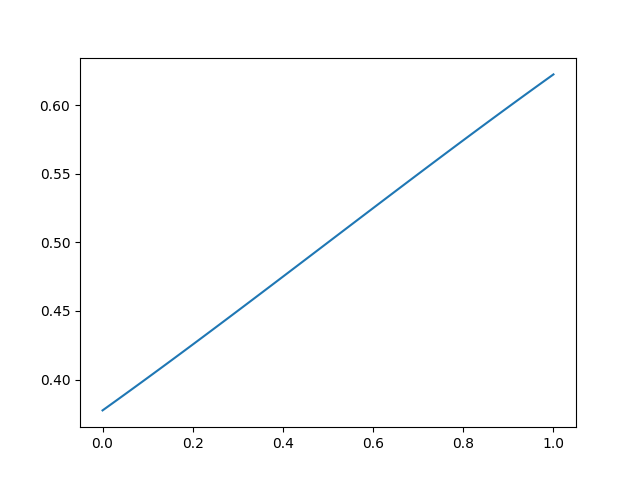

In [164]:
plt.figure()
x = np.linspace(-0, 1, 100)
plt.plot(x, sigmoid(x))
plt.show()

<IPython.core.display.Javascript object>


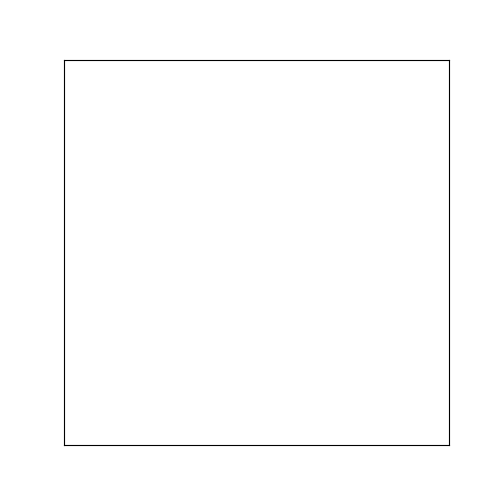

In [171]:
fig = plt.figure(figsize=(5, 5))

ch_i = 2
s_i = 2


curr_hop = hopfield[8].get()


num_frames = 200

start = np.copy(flat_tr[10])

curr_iter = start
cu = curr_iter
ims = []

alp = 0.1

for i in range(num_frames):
    im = plt.imshow(curr_iter.reshape(28, 28), cmap="gray_r", animated=True)
    ims.append([im])
    
    update = curr_hop @ curr_iter
    curr_iter += alp * (update - curr_iter)
    np.clip(curr_iter, 0, 1, curr_iter)
    
    
    

#     update = curr_hop @ curr_iter
#     cu += alp * (update - cu)
    
#     curr_iter = sigmoid(cu)

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=500)

plt.xticks([])
plt.yticks([])
plt.show() 


<IPython.core.display.Javascript object>


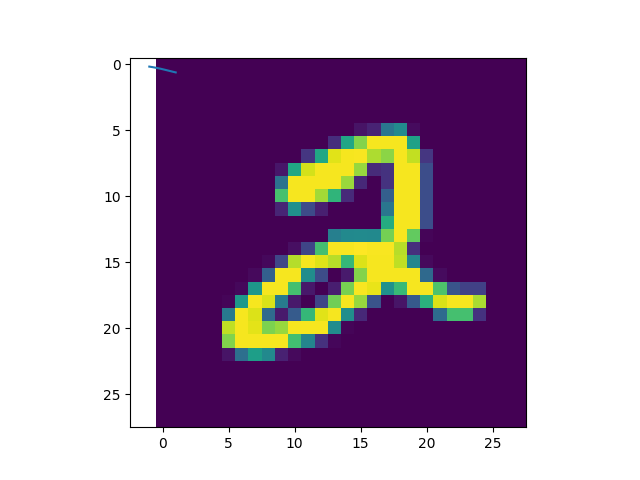

In [139]:
plt.figure()
plt.imshow(flat_tr[5].reshape(28, 28))
plt.show()

In [145]:
np.sigmoid

AttributeError: module 'numpy' has no attribute 'sigmoid'

<IPython.core.display.Javascript object>


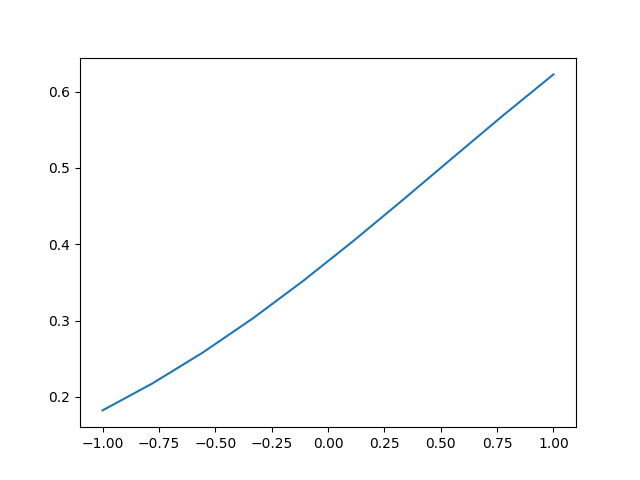

In [149]:
plt.figure()
x = np.linspace(-1, 1, 10)
plt.plot(x, sigmoid(x))
plt.show()